<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/53818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As in the OP, except try to use better precision:

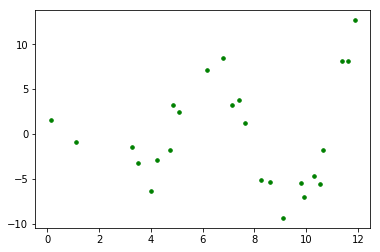

In [66]:
import numpy as np
import matplotlib.pyplot as plt


def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(np.longdouble(x)) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show()

In [90]:
type(y[0])

numpy.float128

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for p in range(1,30):
    plot_range = [i/10 for i in range(0,120)]
    poly = PolynomialFeatures(p)
    X_fin = poly.fit_transform([[samp] for samp in x])
    X_fin_plot = poly.fit_transform([[samp] for samp in plot_range])
    reg = LinearRegression().fit(X_fin, y)

    from sklearn.metrics import mean_squared_error, r2_score
    print(p,r2_score(y, reg.predict(X_fin)))

1 0.011428827986298185
2 0.049824884417237536
3 0.18510530303518846
4 0.7524959057278297
5 0.7849414255228335
6 0.883372862306162
7 0.9045044030836533
8 0.9394157666425363
9 0.9518632304961523
10 0.951992420205271
11 0.9535095748926792
12 0.9521059512715203
13 0.9495410592268169
14 0.9458024870565721
15 0.9418520107231447
16 0.9405653534483068
17 0.9337912337760239
18 0.923540608174988
19 0.9150580889315411
20 0.9098877179697926
21 0.9087915968482445
22 0.9037422497047429
23 0.8945135026074984
24 0.8819064591003116
25 0.8669722586908764
26 0.850671481614115
27 0.8337637689381888
28 0.7261217111510339
29 0.7126553231722585


In [91]:
type(X_fin[0,0])

numpy.float64

Unfortunately, sklearn automatically has cast us back down to float64's...

In [71]:
reg.coef_

array([-2.15699472e-20,  6.34191867e-23,  4.13697839e-26, -6.22013603e-28,
        3.17236397e-30,  4.44991496e-30,  3.26377017e-29,  2.34378115e-28,
        1.65497898e-27,  1.14923786e-26,  7.83956463e-26,  5.24266815e-25,
        3.42715053e-24,  2.18162169e-23,  1.34573681e-22,  7.99329235e-22,
        4.53392541e-21,  2.42867004e-20,  1.20970456e-19,  5.47759538e-19,
        2.17662418e-18,  7.14175946e-18,  1.70684073e-17,  2.01684452e-17,
       -1.54401693e-17,  4.02804514e-18, -5.35084232e-19,  3.91929698e-20,
       -1.51369279e-21,  2.41719937e-23])

(array([-7.27124977e-23,  5.99552863e-22,  2.70965459e-24, -2.16792885e-25,
       -8.29400054e-27, -9.62830430e-28, -7.09742585e-29,  2.94945943e-28,
        2.13806856e-27,  1.46393021e-26,  9.86750839e-26,  6.53365710e-25,
        4.23524894e-24,  2.67647692e-23,  1.64048101e-22,  9.68894100e-22,
        5.46791476e-21,  2.91560519e-20,  1.44622986e-19,  6.52389796e-19,
        2.58347489e-18,  8.45016406e-18,  2.01390571e-17,  2.37470049e-17,
       -1.80729927e-17,  4.69331028e-18, -6.20988156e-19,  4.53256536e-20,
       -1.74505214e-21,  2.77876142e-23]), array([], dtype=float64), 7, array([1.74673168e+31, 2.03479963e+28, 6.75579705e+25, 2.47150857e+23,
       1.79426999e+21, 1.68006616e+19, 1.54723519e+17, 2.20703707e+15,
       3.46213112e+13, 2.76068048e+13, 6.53615022e+11, 1.01563184e+11,
       1.49208430e+10, 7.10031989e+08, 4.14658000e+08, 1.41208183e+07,
       2.51036395e+06, 7.39040636e+05, 3.13389577e+04, 2.29231274e+04,
       4.06070145e+03, 1.08387721e+03, 1.042274

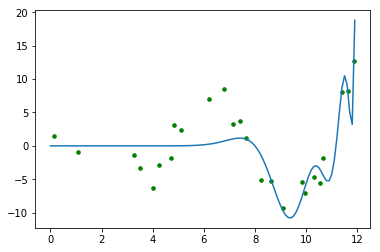

In [72]:
from scipy.linalg import lstsq
out = lstsq(X_fin, y)
print(out)
p = out[0]
plot_range = [i/10 for i in range(0,120)]
plt.scatter(x, y, color='green', s=50, marker='.')
plt.plot(plot_range,X_fin_plot@p)
plt.show()

# Rescale things, so that the 24th powers don't diverge quite so much:

In [0]:
x_sc = (10+np.longdouble(x))/24
plot_range_sc = np.longdouble((10+np.array(plot_range))/24)

In [82]:
for p in range(1,30):
    plot_range = [i/10 for i in range(0,120)]
    poly = PolynomialFeatures(p)
    X_fin = poly.fit_transform([[samp] for samp in x_sc])
    X_fin_plot = poly.fit_transform([[samp] for samp in plot_range_sc])
    reg = LinearRegression().fit(X_fin, y)

    from sklearn.metrics import mean_squared_error, r2_score
    print(p,r2_score(y, reg.predict(X_fin)))

1 0.011428827986298185
2 0.049824884417237536
3 0.18510530303518602
4 0.7524959057277869
5 0.784941425522926
6 0.8833728623085528
7 0.9045044031029656
8 0.9394157670063518
9 0.9518632280982889
10 0.951992411594822
11 0.9535126179587199
12 0.957145096885098
13 0.9631896012324069
14 0.9633918895274786
15 0.9639783450857222
16 0.9641071602726566
17 0.9641954933818148
18 0.9642842474103579
19 0.9669955788906639
20 0.9671503542187585
21 0.9669799699290126
22 0.9667149826472317
23 0.9665419869408751
24 0.9689217306108523
25 0.9688833854305549
26 0.9690891604031492
27 0.9690520208381211
28 0.9692332308303898
29 0.9693984055707766


Much better, though still not the perfect 24th-degree polynomial we theoretically have.

(array([-9.70735879e+09,  1.62489216e+11, -1.18372780e+12,  4.84204523e+12,
       -1.18061140e+13,  1.60671047e+13, -7.29622437e+12, -9.49103779e+12,
        9.84862139e+12,  7.85291665e+12, -8.60879261e+12, -9.50738538e+12,
        5.02663914e+12,  1.15028301e+13,  7.94717843e+11, -1.11151291e+13,
       -7.19590952e+12,  7.32182678e+12,  1.16892285e+13, -1.95712566e+12,
       -1.37963685e+13, -9.75089382e+11,  1.71893316e+13, -1.19358536e+13,
        2.58071453e+12]), array([], dtype=float64), 16, array([7.71500877e+00, 2.17173309e+00, 5.52044287e-01, 1.39313172e-01,
       3.00874756e-02, 4.69103972e-03, 7.91697434e-04, 1.23507580e-04,
       1.52646534e-05, 1.29587522e-06, 8.77543799e-08, 5.65212329e-09,
       3.47783420e-10, 1.60453592e-11, 7.88822085e-13, 2.59927120e-14,
       8.51963151e-16, 2.74341805e-17, 2.14843389e-17, 1.95349324e-17,
       7.30847754e-18, 5.80764785e-18, 5.03208411e-18, 3.04650858e-18,
       9.12813935e-19]))


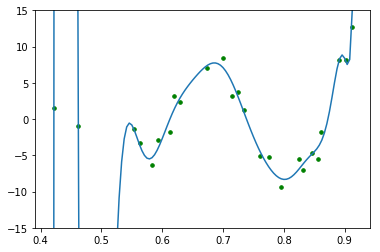

In [84]:
poly = PolynomialFeatures(24)
X_fin = poly.fit_transform([[samp] for samp in x_sc])
X_fin_plot = poly.fit_transform([[samp] for samp in plot_range_sc])
out = lstsq(X_fin, y)
print(out)
p = out[0]
plt.scatter(x_sc, y, color='green', s=50, marker='.')
plt.plot(plot_range_sc,X_fin_plot@p)
plt.ylim((-15,15))
plt.show()